# PHYS 248R - Section Notes for November 10
## Ring Imaging Cherenkov Detectors

## Introduction

Ring Cherenkov detectors are used to discern particle species, including electrons, muons, pions, and kaons. Cherenkov light is produced when a particle moves faster than the speed of light in a medium ($n>1$). As a reminder, the Cherenkov angle of a particle moving with velocity $\beta$ is 
$$\cos\theta_C = \frac{1}{\beta n(\lambda)}$$
Note that the solutions are nonphysical when $\beta < 1/n$. The maximum angle of emission depends only on the index of refraction of the medium:
$$\cos\theta_C^{max} = \frac{1}{n(\lambda)}$$
Let's take a look at what that looks like:

In [12]:
import numpy as np
import matplotlib.pyplot as plt

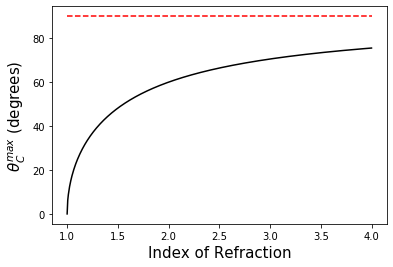

In [13]:
nArray = np.linspace(1,4,500)
thetaCMax = np.arccos(1/nArray)*180./np.pi
plt.plot(nArray, thetaCMax, 'k-')
plt.plot(nArray,np.ones(len(nArray))*90., 'r--')
plt.xlabel('Index of Refraction',fontsize=15)
plt.ylabel(r'$\theta_C^{max}$ (degrees)',fontsize=15)
plt.show()

## The STAR RICH Detector

The STAR detector at the Relativistic Heavy Ion Collider (RHIC) at BNL on Long Island uses a RICH detector. As we've seen in clase, the basic design consists of a thin radiator layer in which particles produce Cherenkov radiation. Those photons travel accross a gap to a photo-sensitive detection plane where a ring of photons are measured and properties of the passing particle can be reconstructed. A diagram of the STAR detector's RICH system is shown below.

<img src="img/RICH.png" width=400 height=400 />

The photon ring measured with thin CsI pads that convert VUV photons to lower-energy photons in the sensitivity range of some phototubes. The resolution on the reconstructed Cherenkov angle is quoted as $\sigma(\theta_C) = 3.9$ mrad. The radiator is a 1 cm thick radiator made of liquid n-Hexane ($C_6F_{14}$). It is chosen in part because it is chemically inert and has a good index of refraction. The challenge is that it is very good at dissolving water and oxygen, which are both UV quenchers. (Fun fact, you can submerge yourself in the stuff and not drown if there is enough oxygen dissolved in it). The CsI pads are 8x8 mm$^2$. 

Take a look at the plots below. The quantum efficiency of the combined CsI photo-converter pads and STAR PMT's are high between 165 nm and 200 nm. The index of refraction of the $C_6F_{14}$ radiator has a variable index of refraction over this wavelength range, but can be taken as $n=1.29$ to first approximation. The maximum Cherenkov angle is 39.2$^\circ$.

<img src="img/QEff.png" width=600 height=350 />

Letting $R$ be the reconstructed radius of the ring and $d$ be the length of the proximity gap, the uncorrected Cherenkov angle is given by 
$$\theta_C^\prime = \arctan\left(\frac{R}{d}\right)$$
But this must be corrected for the diffraction in the radiator, which gives a Cherenkov angle of 
$$\theta_C = \arcsin\left(\frac{1}{n}\frac{1}{\sqrt{1+d^2/R^2}}\right)$$

We can calculate the threshold momentum to produce Cherenkov radiation, and always follow:
$$\beta = \sqrt{\frac{1}{1+m^2/p^2}} > \frac{1}{n} \Rightarrow p > \frac{m}{\sqrt{n^2-1}}$$

- $p_e^{min} =  0.627$ MeV
- $p_\mu^{min} =  130$ MeV
- $p_\pi^{min} = 172$ MeV
- $p_K^{min} = 606$ MeV

The STAR detector has a tracking detector inside the RICH, so there is an independent momentum measurement. Based on the momentum, we can make a PID decision based on whether or not we saw Cherenkov radiation:

<img src="img/PIDThreshold.png" width=800 height=350 />

So we only have information when $p > 0.627$ MeV, which is most cases, so let's say for simplicity that we're only interested in particles with at least 1 MeV momentum. Is there a way to disambiguate PID when multiple particles could give Cherenkov radiation, that is when $p > p_\mu^{min}$ (and others)?

## Disambiguating PID

We can measure the Cherenkov angle, which gives a measurement of $\beta$. This coupled with the independent momentum measurement can produce a measurement of the particle's mass. Taking our expression for $\beta$ in terms of the Cherenkov angle and the mass/momentum, we have
$$m = p\sqrt{\cos^2\theta_C n^2-1}$$

If we ignore the momentum resolution (which is not a good thing to do IRL) we can derive the resolution on the mass:

$$\sigma(m) = \sigma(\theta_C)\frac{p n^2\sin(2\theta_C)}{\sqrt{2(\cos^2\theta_C n^2 -1)}}$$

Let's consider the reconstruction of different particles' masses.

In [125]:
n = 1.29
def CalculateSigM(p,m):
    theta = np.arccos(1/n * np.sqrt(1+m**2/p**2))
    return 3.9e-3*p*n**2*np.sin(2*theta)**2/np.sqrt(2*(np.cos(theta)**2*n**2-1))
p_e = np.linspace(100,1000,100)
sigM_e = CalculateSigM(p_e,.511)
p_mu = np.linspace(130.5,1000,100)
sigM_mu = CalculateSigM(p_mu,106)
p_pi = np.linspace(172,1000,100)
sigM_pi = CalculateSigM(p_pi,140)
p_K = np.linspace(606,1000,100)
sigM_K = CalculateSigM(p_K,490)

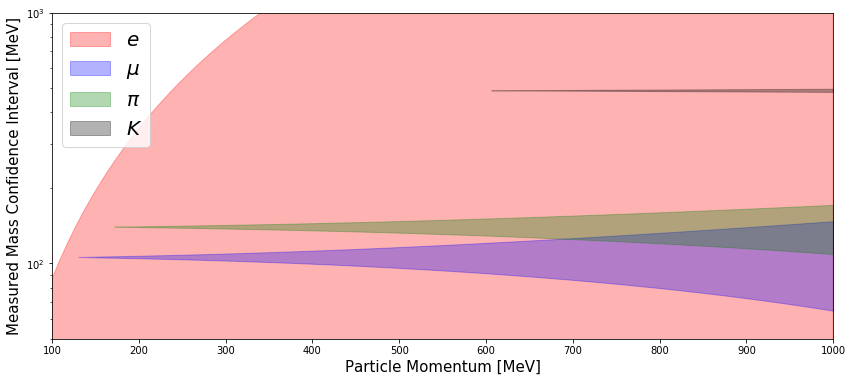

In [127]:
plt.figure(figsize=(14,6))
axes = plt.gca()
axes.set_xlim([100,1000])
axes.set_ylim([5e1,1e3])
plt.fill_between(p_e, np.ones(len(p_e))*.511 - sigM_e,np.ones(len(p_e))*.511 + sigM_e,alpha=.3,color='r',label=r'$e$')
plt.fill_between(p_mu, np.ones(len(p_mu))*106 - sigM_mu,np.ones(len(p_mu))*106 + sigM_mu,alpha=.3,color='b',label=r'$\mu$')
plt.fill_between(p_pi, np.ones(len(p_pi))*140 - sigM_pi,np.ones(len(p_pi))*140 + sigM_pi,alpha=.3,color='g',label=r'$\pi$')
plt.fill_between(p_K, np.ones(len(p_K))*490 - sigM_K,np.ones(len(p_K))*490 + sigM_K,alpha=.3,color='k',label=r'$K$')
plt.yscale('log')
plt.ylabel('Measured Mass Confidence Interval [MeV]',fontsize=15)
plt.xlabel('Particle Momentum [MeV]',fontsize=15)
plt.legend(prop={'size': 20},loc='upper left')
plt.show()

So by reconstructing the particle's mass using the measured angle of Cherenkov radiation, we can disambiguate muons and pions up to around 700 MeV in momentum. The mass resolution for the electron is pretty bad, so it's harder to reliably separate electrons from other particles.

## One more trick for PID

Another process that depends on the mass of the particle is multiple scattering. Electrons will experience it most significantly and it will lead to a smearing out of the Cherenkov ring, producing a "fuzzy" ring. The planar angle of multiple scattering of a particle in a material is given by 
$$\theta_0 = \frac{13.6\text{ MeV}}{\beta c p}z\sqrt{x/X_0}\left[1+ 0.038\ln(x/X_0)\right]$$
The radiation length of n-Hexane is 68.27 cm, so the radiator is too thin to cause electron showering. We can plot the MS angle for the 4 particles in the momentum range we care about:

In [88]:
X0 = 68.27 # radiation length [cm]
d = 8. # Proximity gap length [cm]
def CalculateThetaMS(p,m):
    return 1e3*13.6/np.sqrt(1/(1+m**2/p**2))/p*np.sqrt(d/X0)*(1+0.038*np.log(d/X0))

p = np.linspace(120, 1000, 600) # momentum range from 125 MeV to 1000 GeV
MS_e = CalculateThetaMS(p,0.511)
MS_mu = CalculateThetaMS(p,106)
MS_pi = CalculateThetaMS(p,140)
MS_K = CalculateThetaMS(p,494)

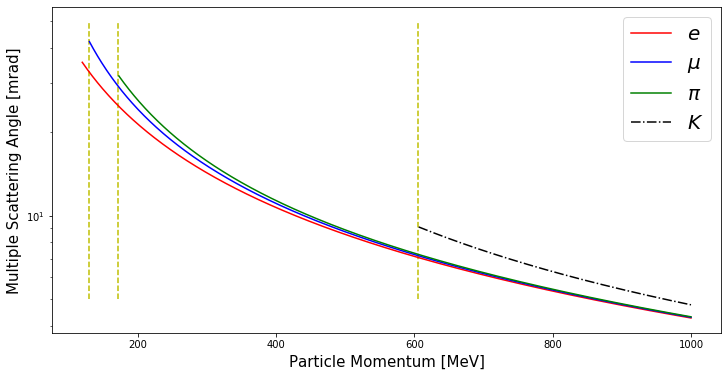

In [89]:
plt.figure(figsize=(12,6))
plt.plot(p, MS_e,'r-',label=r'$e$')
plt.plot(p[np.where(p>130)], MS_mu[np.where(p>130)],'b-',label=r'$\mu$')
plt.plot(p[np.where(p>172)], MS_pi[np.where(p>172)],'g-',label=r'$\pi$')
plt.plot(p[np.where(p>606)], MS_K[np.where(p>606)],'k-.',label=r'$K$')
plt.vlines([130, 172,606],5,5e1,'y','--')
plt.xlabel('Particle Momentum [MeV]',fontsize=15)
plt.ylabel('Multiple Scattering Angle [mrad]', fontsize=15)
plt.legend(prop={'size': 20})
plt.yscale('log')
plt.show()

The yellow vertical lines demarkate the Cherenkov radiation momentum thresholds. Below 130 MeV there is no need for additional information because only the electron will radiate. But between 130 MeV and 172 MeV we might be able to get some additional information. Above 172 MeV it looks less hopeful. 

We know that the resolution in the Cherenkov angle is 3.9 mrad, so the STAR RICH could only be sensitive to MS angles differences between particles roughly down to this level. The effect of MS will smear the resolution of the Cherenkov angle, so the modified resolution would be $\sigma^\prime(\theta_C) = \sqrt{(3.9\text{ mrad})^2 + \theta_{MS}^2}$. 

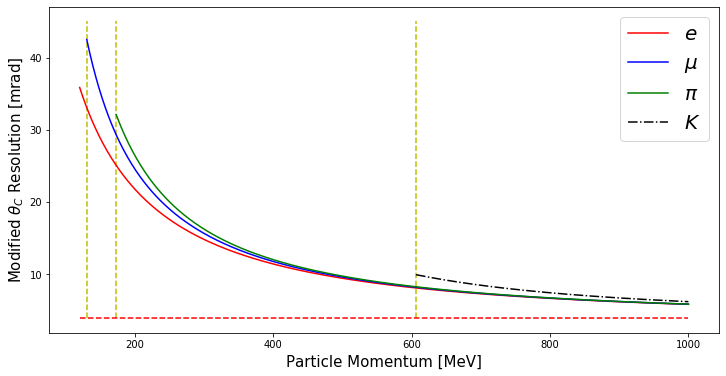

In [90]:
plt.figure(figsize=(12,6))
plt.plot(p, np.sqrt(MS_e**2+3.9**2),'r-',label=r'$e$')
plt.plot(p[np.where(p>130)], np.sqrt(MS_mu[np.where(p>130)]**2+3.9**2),'b-',label=r'$\mu$')
plt.plot(p[np.where(p>172)], np.sqrt(MS_pi[np.where(p>172)]**2+3.9**2),'g-',label=r'$\pi$')
plt.plot(p[np.where(p>606)], np.sqrt(MS_K[np.where(p>606)]**2+3.9**2),'k-.',label=r'$K$')
plt.vlines([130, 172,606],3.9,45,'y','--')
plt.hlines([3.9],min(p),max(p),'r','--')
plt.xlabel('Particle Momentum [MeV]',fontsize=15)
plt.ylabel(r'Modified $\theta_C$ Resolution [mrad]', fontsize=15)
plt.legend(prop={'size': 20})
#plt.yscale('log')
plt.show()

It looks like we could probably separate $e$ and $\mu$ between 130 and 172 MeV, and maybe we could separate $e$ from $\mu/\pi$ a bit beyond 172 MeV. Beyond that it seems unlikely that the difference in $\theta_C$ resolution will be useful for discriminating $e$, $\mu$, and $\pi$. However, beyond 606 MeV we can probably separate $K$ from the lighter particles up to around 1 GeV. 

## Caveats

This discussion is very back-of-the-envelope. Some effects that have interesting and important impacts on the performance of the detector are:

- The full material budget of the RICH (quartz window, the actual sense-wires that the RICH detector uses)

- Variability of the index of refraction with wavelength

- Finite pad size, translating to a component of the resolution on the Cherenkov angle

- Stochastic uncertainty due to photo-electron statistics in the PMTs

- Particles usually will not pass through the radiator perpendicularly, so Cherenkov angle correction and multiple scattering will be different

##  Bonus: PID in Kamioka Neutrino Observatory

The Kamioka Neutrino Observatory (Kamiokande/Super-K) is a large (36m x 32 m) cylindrical vessel of water lined with vacuum PMTs. It is a water-Cherenkov neuttrino detector. It uses similar PID of Cherenkov rings to discerne $\nu_e$ and $\nu_\mu$ charged-current interactions. The produced $e/\mu$ will produce a Cherenkov cone before losing energy and falling below the Cherenkov threshold. Electrons will undergo multiple scattering, so the Cherenkov ring will be fuzzy, and this feature is used to discriminate the two charged lepton flavors:

<img src="img/SuperK.png" width=600 height=350 />

## References:
[1] [Cleaning and recirculation of perfluorohexane (C6F14) in the STAR-RICH detector](https://www.sciencedirect.com/science/article/pii/S0168900201021581)

[2] [PDG Multiple Scatteroing](https://pdg.lbl.gov/2005/reviews/passagerpp.pdf)

[3] [n-Hexane Material Properties](https://pdg.lbl.gov/2020/AtomicNuclearProperties/HTML/n-hexane.html)

[4] [T2K Experiment](https://www.nature.com/articles/s41586-020-2177-0)